<a href="https://colab.research.google.com/github/gaspiman/tensorflow_certification/blob/master/week3_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [20]:
mnist = keras.datasets.fashion_mnist

In [22]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [23]:
train_x = train_x/255.0
test_x = test_x/255.0
train_x = train_x.reshape(train_x.shape[0] , train_x.shape[1], train_x.shape[2], 1)
test_x = test_x.reshape(test_x.shape[0] , test_x.shape[1], test_x.shape[2], 1)

In [12]:
def build_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(
      optimizer=keras.optimizers.Adam(), 
      loss= keras.losses.sparse_categorical_crossentropy, 
      metrics=['accuracy']
  )
  return model

In [18]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x=train_x / 255.0
train_x=train_x.reshape(60000, 28, 28, 1)
test_x=test_x/255.0
test_x = test_x.reshape(10000, 28, 28, 1)

In [7]:
model = build_model()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [9]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    print("\nLatest logs:", logs)
    if logs.get('loss') < 0.5:
      print('Callback function has detected low loss. Interrupting training...')
      self.model.stop_training = True
      

In [27]:
model.fit(train_x, train_y, epochs=5, callbacks=[myCallback()])

Epoch 1/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2413 - accuracy: 0.9099
Latest logs: {'loss': 0.2412566989660263, 'accuracy': 0.9099166393280029}
Callback function has detected low loss. Interrupting training...
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2413 - accuracy: 0.9099


In [28]:
test_loss, test_acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 4s 13ms/step - loss: 0.2601 - accuracy: 0.9032


In [30]:
print(test_acc)

0.9031999707221985


In [32]:
import matplotlib.pyplot as plt

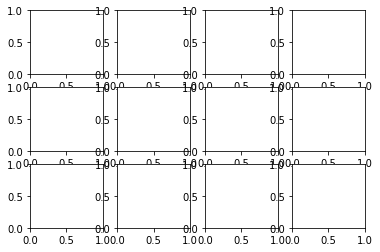

In [34]:
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1

In [35]:
layer_outputs = [layer.output for layer in model.layers]

In [37]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

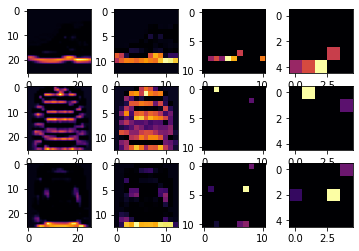

In [40]:
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(test_x[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_x[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_x[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)